In [995]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [997]:
df_main=pd.read_csv("googleplaystore (1).csv")
df=df_main.copy()

In [1127]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


In [1001]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [1003]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [1005]:
df.dropna(subset=["Current Ver"], inplace=True)
df.dropna(subset=["Content Rating"], inplace=True)
df.dropna(subset=["Android Ver"], inplace=True)
df.dropna(subset=["Type"], inplace=True)

In [1007]:
df["Reviews"]=df["Reviews"].astype(float)


In [1009]:
df["Size"] = df["Size"].replace("M", "", regex=True)
df["Size"] = df["Size"].replace("Varies with device", np.nan)
df["Size"] = df["Size"].replace("k", "", regex=True)
# df["Size"]=df["Size"].replace("201k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("23k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("79k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("118k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("695k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("18k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("526k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("334k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("18k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("8.5k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("41k",np.nan,regex=True)
# df["Size"]=df["Size"].replace("292k",np.nan,regex=True)
df["Size"]=df["Size"].astype(float)

In [1011]:
df["Installs"]=df["Installs"].replace(r"\+","",regex=True)
df["Installs"]=df["Installs"].replace(",","",regex=True)
df["Installs"]=df["Installs"].astype(int)



In [1013]:
df["Price"]=df["Price"].str.replace("$","").astype(float)

In [1015]:
df["Content Rating"].isnull().sum()

0

In [1017]:
df["Genres"].isnull().sum()

0

In [1019]:
df["Last Updated"]=pd.to_datetime(df["Last Updated"])

In [1021]:
df["Current Ver"] = df["Current Ver"].str.extract(r'(\d+\.\d+)').astype(float)

In [1023]:
df["Android Ver"] = df["Android Ver"].str.extract(r'(\d+\.\d+)').astype(float)

In [1025]:
df["Android Ver"].isna().sum()

1361

In [1027]:
df["Android Ver"].fillna(df["Android Ver"].mode()[0], inplace=True)
df["Android Ver"].isna().sum()

C:\Users\Domain\AppData\Local\Temp\ipykernel_2784\917208352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Android Ver"].fillna(df["Android Ver"].mode()[0], inplace=True)


0

In [1029]:
df["Current Ver"].fillna(df["Current Ver"].mode()[0], inplace=True)
df["Current Ver"].isnull().sum()


C:\Users\Domain\AppData\Local\Temp\ipykernel_2784\3085245081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Current Ver"].fillna(df["Current Ver"].mode()[0], inplace=True)


0

In [1031]:
df["Current Ver"]

0        1.00
1        2.00
2        1.20
3        1.00
4        1.10
         ... 
10836    1.48
10837    1.00
10838    1.00
10839    1.00
10840    1.00
Name: Current Ver, Length: 10829, dtype: float64

In [1033]:
df["Current Ver"] = pd.to_numeric(df["Current Ver"], errors="coerce")  
df = df[df["Current Ver"] <= 10]
    

In [1035]:
df["Current Ver"].max()

10.0

In [1037]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10449 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10449 non-null  object        
 1   Category        10449 non-null  object        
 2   Rating          9033 non-null   float64       
 3   Reviews         10449 non-null  float64       
 4   Size            8785 non-null   float64       
 5   Installs        10449 non-null  int32         
 6   Type            10449 non-null  object        
 7   Price           10449 non-null  float64       
 8   Content Rating  10449 non-null  object        
 9   Genres          10449 non-null  object        
 10  Last Updated    10449 non-null  datetime64[ns]
 11  Current Ver     10449 non-null  float64       
 12  Android Ver     10449 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int32(1), object(5)
memory usage: 1.1+ MB


In [1039]:
df.Rating.max()

5.0

In [1045]:
df.Rating.fillna(df.Rating.mode()[0],inplace=True)
df.Rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.4
10839    4.5
10840    4.5
Name: Rating, Length: 10449, dtype: float64

In [1047]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10449 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10449 non-null  object        
 1   Category        10449 non-null  object        
 2   Rating          10449 non-null  float64       
 3   Reviews         10449 non-null  float64       
 4   Size            8785 non-null   float64       
 5   Installs        10449 non-null  int32         
 6   Type            10449 non-null  object        
 7   Price           10449 non-null  float64       
 8   Content Rating  10449 non-null  object        
 9   Genres          10449 non-null  object        
 10  Last Updated    10449 non-null  datetime64[ns]
 11  Current Ver     10449 non-null  float64       
 12  Android Ver     10449 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int32(1), object(5)
memory usage: 1.1+ MB


In [1053]:
df.Size.fillna(df.Size.mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10449 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10449 non-null  object        
 1   Category        10449 non-null  object        
 2   Rating          10449 non-null  float64       
 3   Reviews         10449 non-null  float64       
 4   Size            10449 non-null  float64       
 5   Installs        10449 non-null  int32         
 6   Type            10449 non-null  object        
 7   Price           10449 non-null  float64       
 8   Content Rating  10449 non-null  object        
 9   Genres          10449 non-null  object        
 10  Last Updated    10449 non-null  datetime64[ns]
 11  Current Ver     10449 non-null  float64       
 12  Android Ver     10449 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int32(1), object(5)
memory usage: 1.1+ MB


C:\Users\Domain\AppData\Local\Temp\ipykernel_2784\402935919.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Size.fillna(df.Size.mean(),inplace=True)


In [1055]:
#all columns has been fixed 

In [1059]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


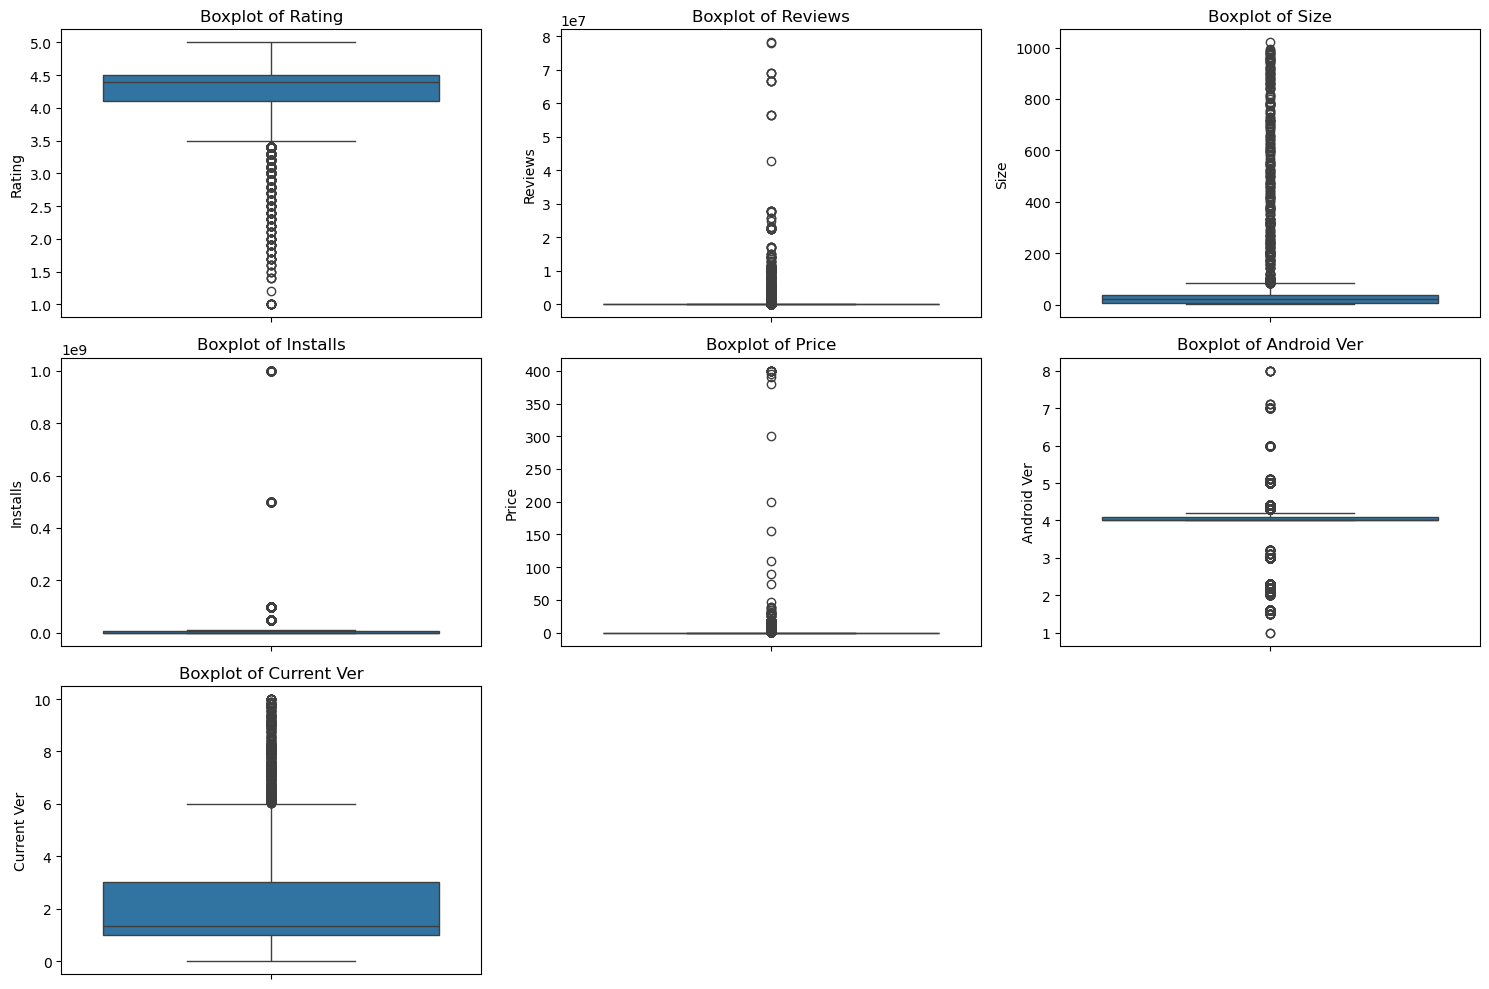

In [1125]:
#detecting the outlier
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))  
numeric_columns = ["Rating", "Reviews", "Size", "Installs", "Price", "Android Ver", "Current Ver"]
for ax, col in zip(axes.flatten(), numeric_columns):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

for i in range(len(numeric_columns), 9):  
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [1114]:
df["Last Updated"].max()

Timestamp('2018-08-08 00:00:00')